In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#Loading Data

In [ ]:
cancer = pd.read_csv('cancer.csv')

In [ ]:
cancer.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      569 non-null    float64
 1   V2      569 non-null    float64
 2   V3      569 non-null    float64
 3   V4      569 non-null    float64
 4   V5      569 non-null    float64
 5   V6      569 non-null    float64
 6   V7      569 non-null    float64
 7   V8      569 non-null    float64
 8   V9      569 non-null    float64
 9   V10     569 non-null    float64
 10  V11     569 non-null    float64
 11  V12     569 non-null    float64
 12  V13     569 non-null    float64
 13  V14     569 non-null    float64
 14  V15     569 non-null    float64
 15  V16     569 non-null    float64
 16  V17     569 non-null    float64
 17  V18     569 non-null    float64
 18  V19     569 non-null    float64
 19  V20     569 non-null    float64
 20  V21     569 non-null    float64
 21  V22     569 non-null    float64
 22  V2

In [ ]:
cancer['Class'].value_counts()

1    357
2    212
Name: Class, dtype: int64

In [ ]:
X = cancer.drop(['Class'],axis=1)

In [ ]:
y = cancer['Class']

#Train And Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


#Decision Tree Concepts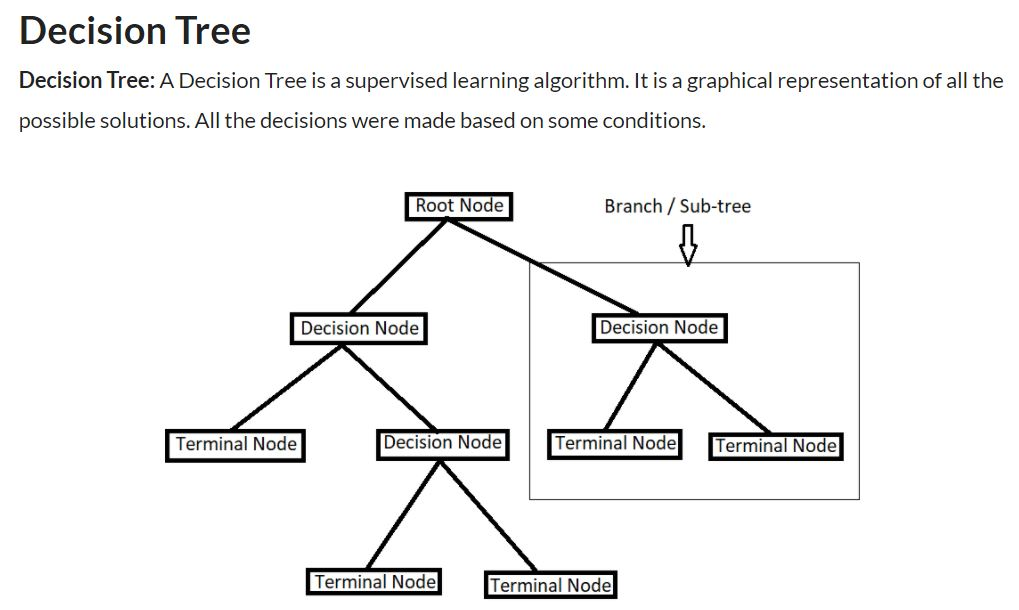

##Terminologies

**Root node:** The root node is the base node of the tree where the entire tree starts from it.

**Terminal Node/Leaf Node:** This is the final node where no further segregation is possible.

**Branch/Sub-tree:** A branch is formed by splitting a node.

**Pruning:** Pruning is the opposite of splitting. Pruning is the process of removing nodes to decrease the size of the decision tree.

Parent Node/Child Node: Always root node is the parent node and all the other nodes which are derived from the parent node are known as child nodes.

**Gini Index**: Gini Index is the measure of impurity or the purity that is used in building a decision tree.

**Entropy**: Entropy is the measure of uncertainty. It is a metric that measures the impurity of something.

Entropy=-ΣP(x)logP(x)

Entropy(s)=-P(yes)logP(yes)-P(no)logP(no)

**Information Gain**: Information gain is the measure of how much information a feature gives about the class. It is the decrease in entropy after splitting the dataset based on the attribute.

Information gain = Entropy(s) –[ (average weight) * Entropy(each feature)]

Constructing a decision tree is all about finding the attribute that has the highest information gain.

**Reduction in Variance**: In general Variance is how much your data is varying. So here also attribute with a lower variance will be split first.

**Chi-square**: It is an algorithm to find the statistical significance of the differences between sub-nodes and parent nodes.

The first step to do before solving the problem for the decision tree is entropy which is used to find information gain. As we know splitting will be done based on information gain. Attribute with highest information gain is selected first.

#Decision Tree with Max depth of 2

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier(max_depth=2)

dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)

print("Metrics on Train samples")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_train,y_train_pred))
print("classification_report: \n",classification_report(y_train,y_train_pred))
print("============================================================== ")

y_test_pred = dt.predict(X_test)

print("Metrics on Test samples ")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_test,y_test_pred))
print("classification_report: \n",classification_report(y_test,y_test_pred))
print("============================================================== ")

Metrics on Train samples
confusion_matrix: 
 [[276  10]
 [ 22 147]]
classification_report: 
               precision    recall  f1-score   support

           1       0.93      0.97      0.95       286
           2       0.94      0.87      0.90       169

    accuracy                           0.93       455
   macro avg       0.93      0.92      0.92       455
weighted avg       0.93      0.93      0.93       455

Metrics on Test samples 
confusion_matrix: 
 [[69  2]
 [ 6 37]]
classification_report: 
               precision    recall  f1-score   support

           1       0.92      0.97      0.95        71
           2       0.95      0.86      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



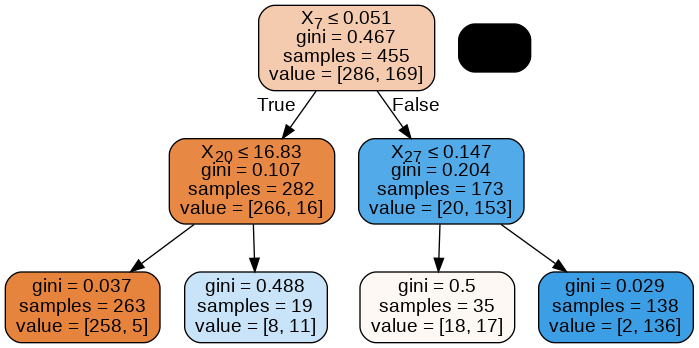

In [ ]:
from sklearn.tree import export_graphviz

from six import StringIO
import pydotplus 
from IPython.display import Image  

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=2)

dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)

print("Metrics on Train samples")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_train,y_train_pred))
print("classification_report: \n",classification_report(y_train,y_train_pred))
print("============================================================== ")

y_test_pred = dt.predict(X_test)

print("Metrics on Test samples ")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_test,y_test_pred))
print("classification_report: \n",classification_report(y_test,y_test_pred))
print("============================================================== ")

Metrics on Train samples
confusion_matrix: 
 [[258  28]
 [  5 164]]
classification_report: 
               precision    recall  f1-score   support

           1       0.98      0.90      0.94       286
           2       0.85      0.97      0.91       169

    accuracy                           0.93       455
   macro avg       0.92      0.94      0.92       455
weighted avg       0.93      0.93      0.93       455

Metrics on Test samples 
confusion_matrix: 
 [[63  8]
 [ 2 41]]
classification_report: 
               precision    recall  f1-score   support

           1       0.97      0.89      0.93        71
           2       0.84      0.95      0.89        43

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



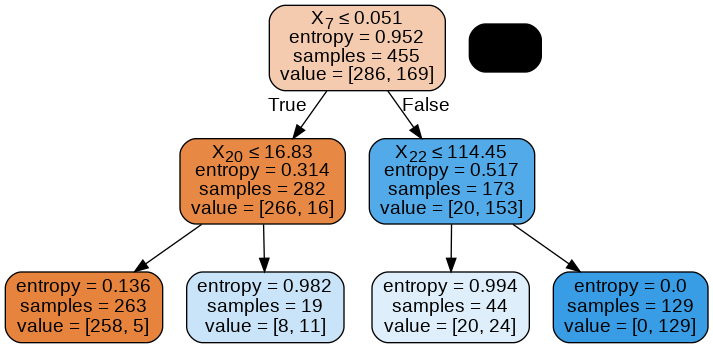

In [ ]:
from sklearn.tree import export_graphviz

from six import StringIO
import pydotplus 
from IPython.display import Image  

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#Decision Tree with Max depth of 5

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)

print("Metrics on Train samples")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_train,y_train_pred))
print("classification_report: \n",classification_report(y_train,y_train_pred))
print("============================================================== ")

y_test_pred = dt.predict(X_test)

print("Metrics on Test samples ")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_test,y_test_pred))
print("classification_report: \n",classification_report(y_test,y_test_pred))
print("============================================================== ")

Metrics on Train samples
confusion_matrix: 
 [[286   0]
 [  2 167]]
classification_report: 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       286
           2       1.00      0.99      0.99       169

    accuracy                           1.00       455
   macro avg       1.00      0.99      1.00       455
weighted avg       1.00      1.00      1.00       455

Metrics on Test samples 
confusion_matrix: 
 [[68  3]
 [ 3 40]]
classification_report: 
               precision    recall  f1-score   support

           1       0.96      0.96      0.96        71
           2       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



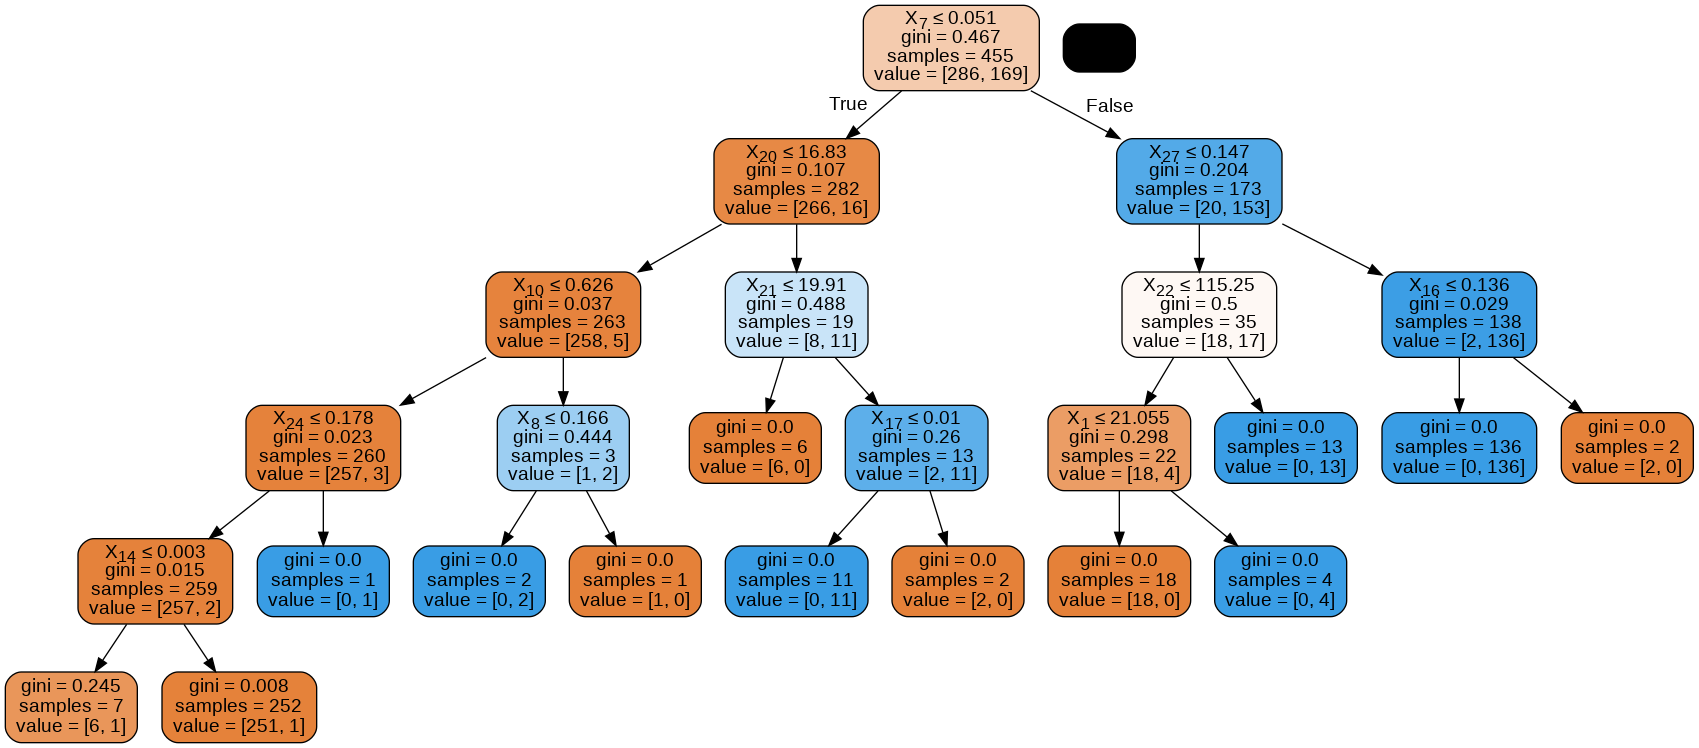

In [ ]:
from sklearn.tree import export_graphviz

from six import StringIO
import pydotplus 
from IPython.display import Image  

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=5)

dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)

print("Metrics on Train samples")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_train,y_train_pred))
print("classification_report: \n",classification_report(y_train,y_train_pred))
print("============================================================== ")

y_test_pred = dt.predict(X_test)

print("Metrics on Test samples ")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_test,y_test_pred))
print("classification_report: \n",classification_report(y_test,y_test_pred))
print("============================================================== ")

Metrics on Train samples
confusion_matrix: 
 [[286   0]
 [  3 166]]
classification_report: 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       286
           2       1.00      0.98      0.99       169

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455

Metrics on Test samples 
confusion_matrix: 
 [[70  1]
 [ 5 38]]
classification_report: 
               precision    recall  f1-score   support

           1       0.93      0.99      0.96        71
           2       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



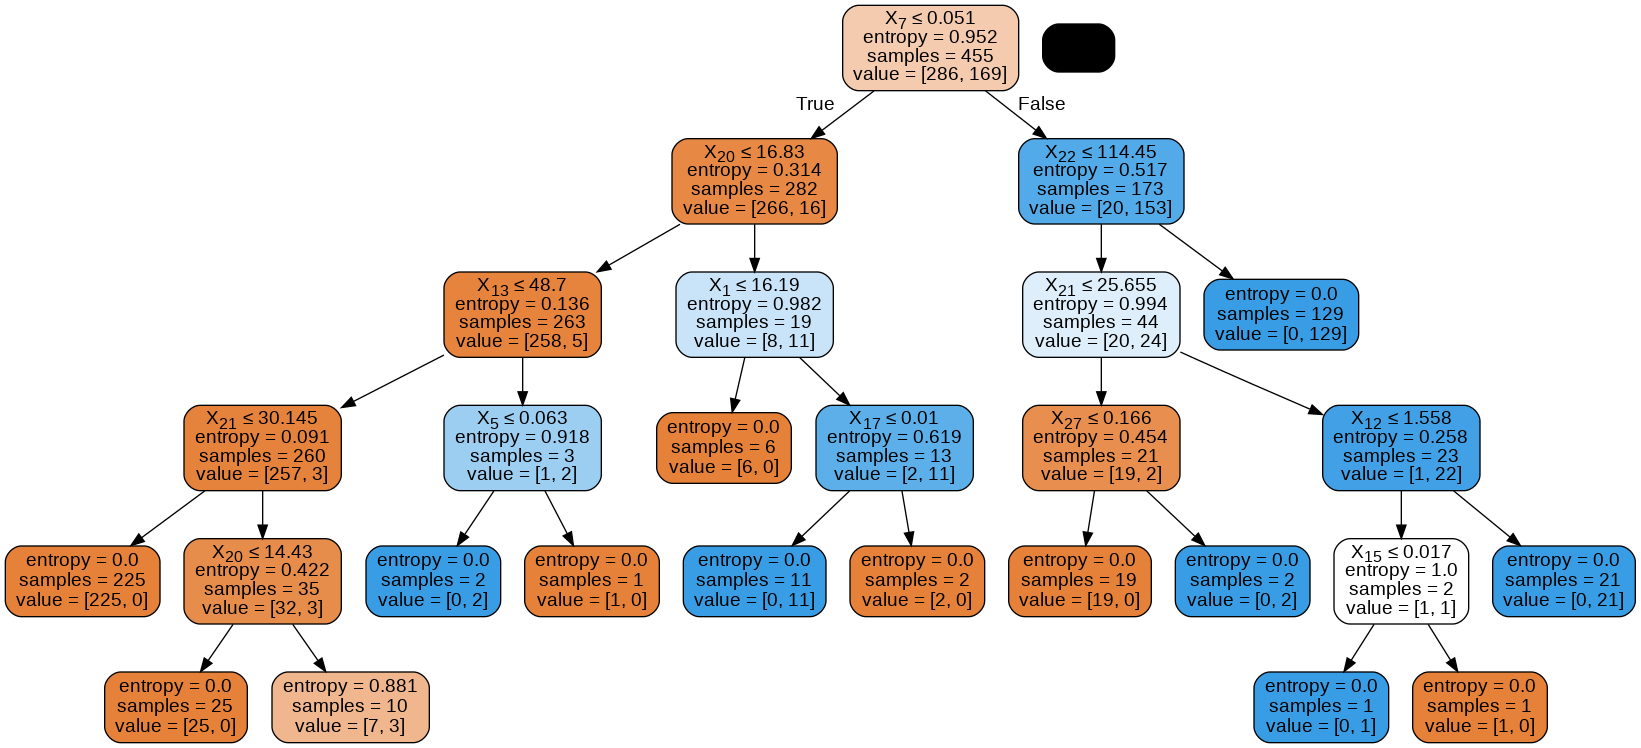

In [ ]:
from sklearn.tree import export_graphviz

from six import StringIO
import pydotplus 
from IPython.display import Image  

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())